# Pytorch

## Tensors

Multi-dimensional array

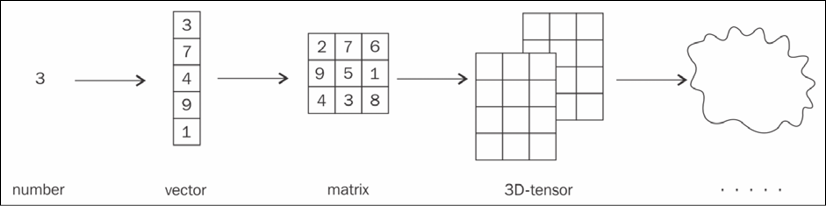

In [2]:
# create a tensor

import torch
import numpy as np

a = torch.FloatTensor(3, 2)

a # 3 rows, 2 columns

tensor([[1.8988e+25, 3.0766e-41],
        [0.0000e+00, 0.0000e+00],
        [2.2773e+25, 3.0766e-41]])

In [4]:
# clear it's memory
a.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

Two types of tensors:

1. inplace - have an underscore appended to their name and operate on the tensor's content, object is returned after
2. functional - creates a copy of the tensor, leaving the original untoched

In [6]:
# list to tensor
torch.FloatTensor([[1,2,3], [3,2,1]])

tensor([[1., 2., 3.],
        [3., 2., 1.]])

In [8]:
# numpy array to tnesor
n = np.zeros(shape=(3,2))

b = torch.tensor(n)
b

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=torch.float64)

In [11]:
# specify the type
n = np.zeros(shape=(3,2), dtype=np.float32)
torch.tensor(n)

# or
torch.tensor(n, dtype=torch.float32)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

### Scalar tensors

Perform an operation to all values in the tensor using a scalar tensor

In [14]:
a = torch.tensor([1,2,3])
s = a.sum()
s # scalar operation

tensor(6)

In [15]:
s.item()

6

In [17]:
torch.tensor(1) # 1d tensor

tensor(1)

### Tensor operations

There's a lot... For example, in-place `abs_()` vs. functional `abs()`

### GPU tensors

Only difference vs. regular CPU tensors is the type `torch.cuda`. All operations are the same. To convert tensor, use `to(device)`

In [20]:
a = torch.FloatTensor([2,3])

ca = a.to('cuda') # copy the tensor to GPU memory
ca

tensor([2., 3.], device='cuda:0')

In [21]:
ca.device

device(type='cuda', index=0)

### Gradients

Automatic computation of gradients

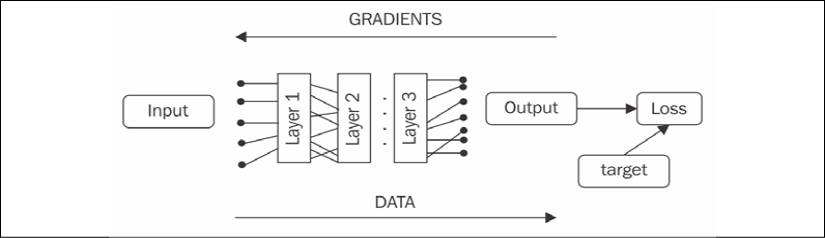

#### Approaches to calculating gradients

**static graph**: Define your calculations and graph in advance

**Dynamic graph**: Don't need to define your graph, just need to execute operations that you wnat to use for data transformation. 

### Properties of tensors

`grad`: holds a tensor of the same shape containing computed gradients

`is_leaf`: `True` if the tensor was constructed by the user and `False` if the object is a result of function transformation

`requires_grad`: `True` if the tensor requires gradients to be calculated. Defaults to `False`

In [25]:
v1 = torch.tensor([1.0, 1.0], requires_grad=True) # requires gradient
v2 = torch.tensor([2.0, 2.0]) # doesn't require gradient

v_sum = v1 + v2 # add both vectors element-wise to [3,3]
v_res = (v_sum*2).sum() # mult and sum = 12
v_res

tensor(12., grad_fn=<SumBackward0>)

Tensor graph of v1 and v2 below

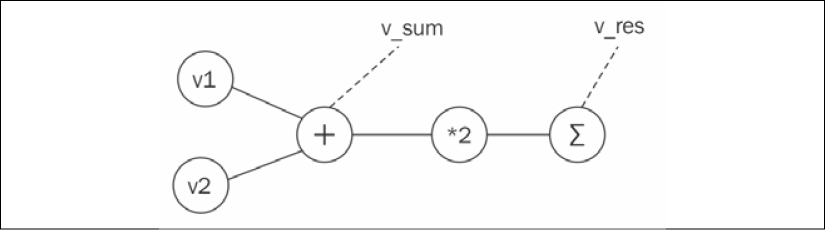

In [28]:
v1.is_leaf, v2.is_leaf # both are leafs

(True, True)

In [29]:
v_sum.is_leaf, v_res.is_leaf # not leafs

(False, False)

In [35]:
v1.requires_grad, v2.requires_grad, v_sum.requires_grad, v_res.requires_grad # some require gradients

(True, False, True, True)

In [36]:
v_res.backward() # calculate the gradient
v1.grad

tensor([2., 2.])

By calling `backward()`, we calculate the derivative of `v_res` with respect to any variable that our graph has

For this example, increasing the value of `v1` or `v2` by 1 causing a resulting 2x increase in the value of `v_res`

PyTorch only calculates gradients for leaf tensors with `requires_grad=True`. Checking the gradients of `v2`, we get nothing

In [39]:
v2.grad, v1.grad

(None, tensor([2., 2.]))

It's more efficient to not calculate certain gradients. FOr exmaple, during gradient descent, we're not interested in gradietns of any intermediate matrix multiplication, only the things we want to adjust in the model are gradients of loss iwth respect to model parameters (weights).

### Summary of tensors

PyTorch provides you with all the tensor creation/operations necessary to create your own neural network optimizer